## Set Up

In [183]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input/gender_submission.csv
input/test.csv
input/train.csv
input/.ipynb_checkpoints/test-checkpoint.csv
input/.ipynb_checkpoints/submission-checkpoint.csv
input/.ipynb_checkpoints/train-checkpoint.csv


## Training Data

In [184]:
train_data = pd.read_csv("input/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [185]:
train_data = train_data.drop(columns=['Name', 'Ticket', 'Cabin'])

train_data = train_data.dropna()

# Convert 'Sex' to numerical values (0 for female, 1 for male)
train_data['Sex'] = train_data['Sex'].map({'female': 0, 'male': 1})

# Encode 'Embarked' as a numeric variable (use 'C' for 0, 'Q' for 1, 'S' for 2)
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Feature selection: Let's use 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_data[features]
y = train_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)

In [186]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1_000_000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000000)

Accuracy: 0.85


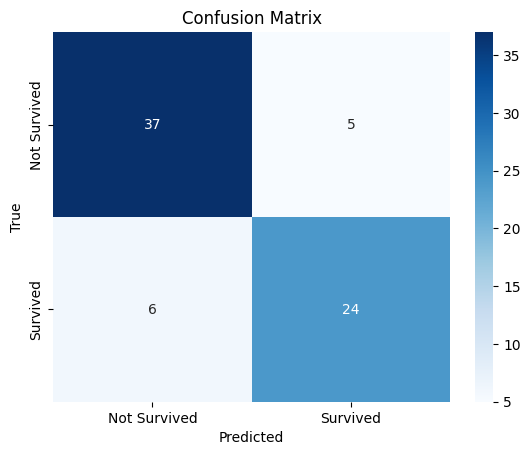

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        42
           1       0.83      0.80      0.81        30

    accuracy                           0.85        72
   macro avg       0.84      0.84      0.84        72
weighted avg       0.85      0.85      0.85        72



In [187]:
# Predict on the test data
y_pred = model.predict(X_test)

# Accuracy score
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

## Test Data

In [188]:
# Read files
df = pd.read_csv("input/test.csv")
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [189]:
# Drop columns that won't help the prediction
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])

# Fill missing values for numeric columns (use the median as an example)
df['Age'] = df['Age'].fillna(df['Age'].median())  # You can also use mean() if preferred
df['SibSp'] = df['SibSp'].fillna(df['SibSp'].median())
df['Parch'] = df['Parch'].fillna(df['Parch'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Fill missing values for categorical columns (use the mode or a placeholder)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Mode (most frequent) value for Embarked
df['Sex'] = df['Sex'].fillna(df['Sex'].mode()[0])  # Fill missing 'Sex' with the mode (most frequent) value

# Convert 'Sex' to numerical values (0 for female, 1 for male)
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

# Encode 'Embarked' as a numeric variable (use 'C' for 0, 'Q' for 1, 'S' for 2)
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Feature selection: Let's use 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Prepare the feature set
X_test = df[features]

In [190]:
# Make predictions using the trained model (predict 'Survived')
predictions = model.predict(X_test)

In [191]:
# Create the output DataFrame with 'PassengerId' and predicted 'Survived'
output = pd.DataFrame({'PassengerId': df['PassengerId'], 'Survived': predictions})

# Save the output to a CSV file
output.to_csv('submission.csv', index=False)